In [ ]:

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "BankChurners.csv.zip")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

In [ ]:
churn <- read_csv("BankChurners.csv.zip");
str(churn)

Rows: 10127 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Ca...
dbl (17): CLIENTNUM, Customer_Age, Dependent_count, Months_on_book, Total_Re...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [10,127 × 23] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ CLIENTNUM                                                                                                                         : num [1:10127] 7.69e+08 8.19e+08 7.14e+08 7.70e+08 7.09e+08 ...
 $ Attrition_Flag                                                                                                                    : chr [1:10127] "Existing Customer" "Existing Customer" "Existing Customer" "Existing Customer" ...
 $ Customer_Age                                                                                                                      : num [1:10127] 45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                                                                                                                            : chr [1:10127] "M" "F" "M" "F" ...
 $ Dependent_count                                                                                                                   : num [1:10127] 3 5 3

In [ ]:
churn <- churn %>% mutate(Attrition_Flag = recode(Attrition_Flag, "Attrited Customer" = 1, "Existing Customer" = 0))

In [ ]:
churn$Attrition_Flag <- as_factor(churn$Attrition_Flag)

churn$Gender <- as_factor(churn$Gender)

churn$Education_Level <- as.factor(churn$Education_Level)

churn$Marital_Status <- as.factor(churn$Marital_Status)

churn$Income_Category <- as.factor(churn$Income_Category)

churn$Card_Category <- as.factor(churn$Card_Category)
str(churn)

tibble [10,127 × 23] (S3: tbl_df/tbl/data.frame)
 $ CLIENTNUM                                                                                                                         : num [1:10127] 7.69e+08 8.19e+08 7.14e+08 7.70e+08 7.09e+08 ...
 $ Attrition_Flag                                                                                                                    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Customer_Age                                                                                                                      : num [1:10127] 45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                                                                                                                            : Factor w/ 2 levels "M","F": 1 2 1 2 1 1 1 1 1 1 ...
 $ Dependent_count                                                                                                                   : num [1:10127] 3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level     

In [ ]:
sapply(churn, function(x) sum(is.na(x)))


CLIENTNUM 
                                                                                                                                 0 
                                                                                                                    Attrition_Flag 
                                                                                                                                 0 
                                                                                                                      Customer_Age 
                                                                                                                                 0 
                                                                                                                            Gender 
                                                                                                                                 0 
                                                                                                                   Dependent_count 
                                                                                                                                 0 
                                                                                                                   Education_Level 
                                                                                                                                 0 
                                                                                                                    Marital_Status 
                                                                                                                                 0 
                                                                                                                   Income_Category 
                                                                                                                                 0 
                                                                                                                     Card_Category 
                                                                                                                                 0 
                                                                                                                    Months_on_book 
                                                                                                                                 0 
                                                                                                          Total_Relationship_Count 
                                                                                                                                 0 
                                                                                                            Months_Inactive_12_mon 
                                                                                                                                 0 
                                                                                                             Contacts_Count_12_mon 
                                                                                                                                 0 
                                                                                                                      Credit_Limit 
                                                                                                                                 0 
                                                                                                               Total_Revolving_Bal 
                                                                                                                                 0 
                                                                                                                   Avg_Open_To_Buy 
                             

Exploratory Data Analysis

In [ ]:
summary(churn)


   CLIENTNUM         Attrition_Flag  Customer_Age   Gender   Dependent_count
 Min.   :708082083   0:8500         Min.   :26.00   M:4769   Min.   :0.000  
 1st Qu.:713036770   1:1627         1st Qu.:41.00   F:5358   1st Qu.:1.000  
 Median :717926358                  Median :46.00            Median :2.000  
 Mean   :739177606                  Mean   :46.33            Mean   :2.346  
 3rd Qu.:773143533                  3rd Qu.:52.00            3rd Qu.:3.000  
 Max.   :828343083                  Max.   :73.00            Max.   :5.000  
                                                                            
      Education_Level  Marital_Status       Income_Category  Card_Category 
 College      :1013   Divorced: 748   $120K +       : 727   Blue    :9436  
 Doctorate    : 451   Married :4687   $40K - $60K   :1790   Gold    : 116  
 Graduate     :3128   Single  :3943   $60K - $80K   :1402   Platinum:  20  
 High School  :2013   Unknown : 749   $80K - $120K  :1535   Silver  : 555  
 Pos

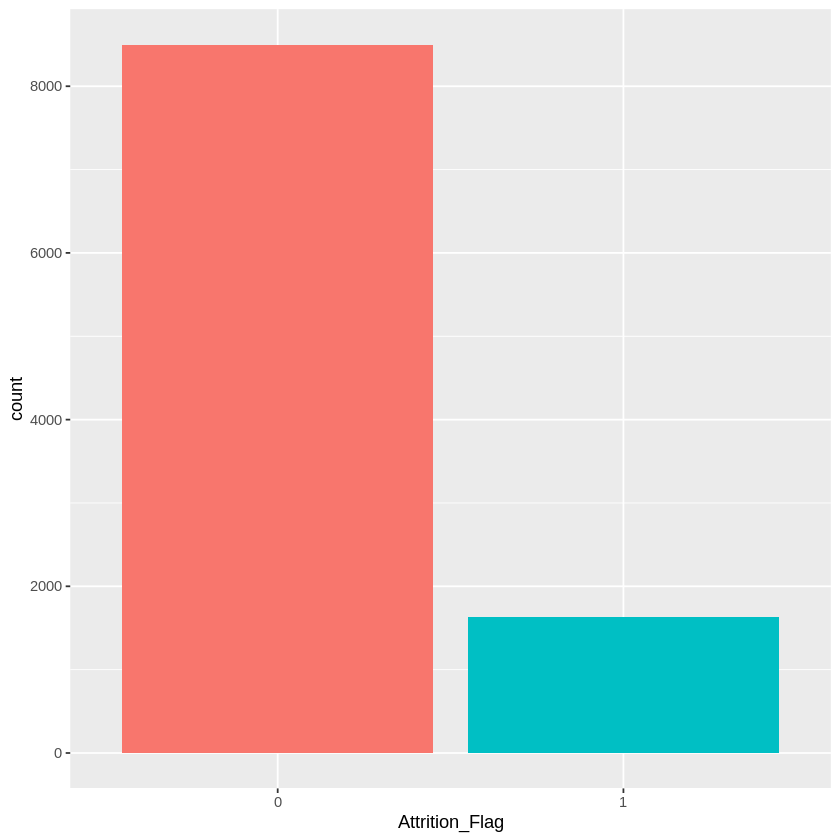

In [ ]:
ggplot(churn, aes(Attrition_Flag, fill = Attrition_Flag)) +
  geom_bar() +
  theme(legend.position = 'none')

In [ ]:
table(churn$Attrition_Flag)
round(prop.table(table(churn$Attrition_Flag)),3)



   0    1 
8500 1627 


    0     1 
0.839 0.161 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


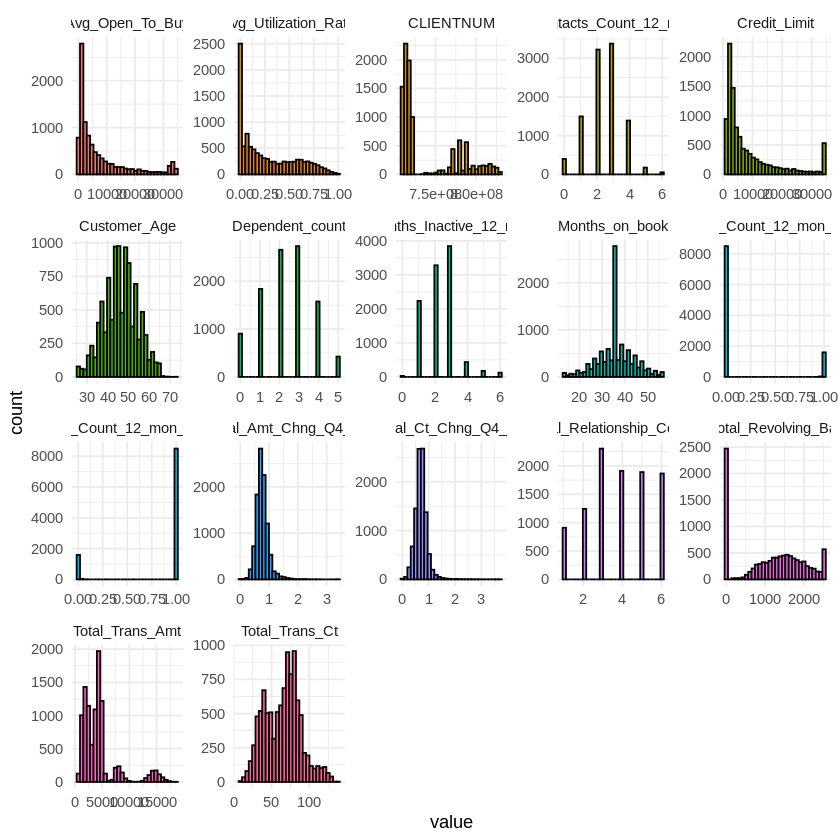

In [ ]:
churn %>%
  keep(is.numeric) %>%
  gather() %>%
  ggplot() +
  geom_histogram(mapping = aes(x=value,fill=key), color="black") +
  facet_wrap(~ key, scales = "free") +
  theme_minimal() +
  theme(legend.position = 'none')

Find correlations between columns

In [ ]:
numeric.var <- sapply(churn, is.numeric)
corr.matrix <- cor(churn[,numeric.var])
return(corr.matrix)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,1.0000000000,0.007612651,0.006771737,0.134587831,0.006906905,0.005728528,0.005694428,0.005707623,0.0008245041,0.0056325068,0.017369340,-0.01969171,-0.002961013,0.007695575,0.000265960,-0.0464105098,0.046410475
Customer_Age,0.0076126512,1.000000000,-0.122253752,0.788912359,-0.010931069,0.054360999,-0.018451855,0.002476227,0.0147798946,0.0011506779,-0.062042092,-0.04644649,-0.067096864,-0.012142548,0.007114222,0.0181886525,-0.018188610
Dependent_count,0.0067717372,-0.122253752,1.000000000,-0.103062281,-0.039076389,-0.010767918,-0.040504960,0.068064600,-0.0026881459,0.0682913039,-0.035439429,0.02504624,0.049912477,0.011087181,-0.037135159,0.0191890165,-0.019189355
Months_on_book,0.1345878309,0.788912359,-0.103062281,1.000000000,-0.009203080,0.074163514,-0.010774479,0.007507009,0.0086228045,0.0067323916,-0.048959320,-0.03859063,-0.049819084,-0.014071671,-0.007540837,0.0136934978,-0.013693505
Total_Relationship_Count,0.0069069051,-0.010931069,-0.039076389,-0.009203080,1.000000000,-0.003675377,0.055203163,-0.071385817,0.0137258489,-0.0726013628,0.050118644,-0.34722888,-0.241890850,0.040831148,0.067662878,-0.1499806221,0.149980621
Months_Inactive_12_mon,0.0057285276,0.054360999,-0.010767918,0.074163514,-0.003675377,1.000000000,0.029492910,-0.020393791,-0.0422096088,-0.0166053838,-0.032246712,-0.03698243,-0.042787039,-0.038989338,-0.007502633,0.1534521178,-0.153451919
Contacts_Count_12_mon,0.0056944278,-0.018451855,-0.040504960,-0.010774479,0.055203163,0.029492910,1.000000000,0.020817012,-0.0539127312,0.0256459612,-0.024445115,-0.11277393,-0.152212605,-0.094996916,-0.055471285,0.2057720744,-0.205772484
Credit_Limit,0.0057076227,0.002476227,0.068064600,0.007507009,-0.071385817,-0.020393791,0.020817012,1.000000000,0.0424926073,0.9959805439,0.012812536,0.17173015,0.075926912,-0.002019850,-0.482965071,-0.0238534134,0.023853482
Total_Revolving_Bal,0.0008245041,0.014779895,-0.002688146,0.008622804,0.013725849,-0.042209609,-0.053912731,0.042492607,1.0000000000,-0.0471671279,0.058173664,0.06437048,0.056060493,0.089861008,0.624021991,-0.2630325068,0.263032475
Avg_Open_To_Buy,0.0056325068,0.001150678,0.068291304,0.006732392,-0.072601363,-0.016605384,0.025645961,0.995980544,-0.0471671279,1.0000000000,0.007594529,0.16592323,0.070885102,-0.010075538,-0.538807748,-0.0002673269,0.000267398


In [ ]:
churn <- subset(churn, select = -c(Months_on_book, Total_Trans_Ct, Total_Revolving_Bal))


ERROR: Error in eval(substitute(select), nl, parent.frame()): object 'Months_on_book' not found


ERROR: Error in eval(substitute(select), nl, parent.frame()): object 'Months_on_book' not found
